In [1]:
import tweepy
import re
import pickle
import numpy as np
from tweepy import OAuthHandler
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Initializing the keys
consumer_key = 'CIFjmXPDQccyG2uLkFrO4LJcx'
consumer_secret = '6U88AaFE2wd7tjvDKPvXEv7qFthxi82yMXmt2V2CPYvLQyY5JS' 
access_token = '1181430333033500672-Qkfih9BiNOBIAqhnaTmapqhbRaKTTL'
access_secret ='24FxebVyhzy1NBtSaET6FTQNDokI87zCQO1oxwO4Nv1OM'

In [3]:
# Initializing the tokens
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
args = ['#MeToo']
api = tweepy.API(auth,timeout=10)

In [4]:
# Fetching the tweets
list_tweets = []

query = args[0]
if len(args) == 1:
    for status in tweepy.Cursor(api.search,q=query+" -filter:retweets",lang='en',result_type='recent').items(100):
        list_tweets.append(status.text)

In [5]:
list_tweets

['TFW Facebook suggests you might know the guy who used to sexually harass you 20+ years ago... #metoo',
 '#ExposeCNN\n\n#BirtherInChief #CorpMedia #Idiocracy #Oligarchs #MegaBanks vs #Union #Occupy #NoDAPL #BLM #SDF #DACA… https://t.co/vpHfcQiDPl',
 'Brilliant and courageous, #saradanius. Nobel figure Sara Danius who quit after #Metoo crisis dies https://t.co/HGtnlEskmV via @FRANCE24',
 '“in the cur\xadrent era of #MeToo and mi\xadcroag\xadgres\xadsions, a lot of bosses are hav\xading a particularly hard time giv\xadin… https://t.co/yrkumsbrfs',
 '@wendyblazer65 Twiki is nothing compared to the show Alice! #metoo every single episode! #Kissmygrits #metvbuckrogers',
 '#ExposeCNN\n\n#BirtherInChief #CorpMedia #Idiocracy #Oligarchs #MegaBanks vs #Union #Occupy #NoDAPL #BLM #SDF #DACA… https://t.co/SwvIbtMe4X',
 '#metvbuckrogers Twiki needs some #metoo lessons!',
 '@edmonddantex @Fungusty #metoo but I think too late',
 "So good I had to share! Check out all the items I'm loving on @Poshma

In [6]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, ' ', input_txt)
        
    return input_txt    

In [7]:
# remove twitter handles (@user) , hyperlinks
list_tweets = np.vectorize(remove_pattern)(list_tweets, "@[\w]*")
list_tweets = np.vectorize(remove_pattern)(list_tweets, "\s+https://t.co/[\w\d]*$")
list_tweets = np.vectorize(remove_pattern)(list_tweets, "^https://t.co/[a-zA-Z0-9]*\s")
list_tweets = np.vectorize(remove_pattern)(list_tweets, "\s+https://t.co/[a-zA-Z0-9]*\s")
list_tweets = np.vectorize(remove_pattern)(list_tweets, "\d")
list_tweets = np.vectorize(remove_pattern)(list_tweets, "[\n]")

In [8]:
list_tweets

array(['TFW Facebook suggests you might know the guy who used to sexually harass you   + years ago... #metoo',
       '#ExposeCNN  #BirtherInChief #CorpMedia #Idiocracy #Oligarchs #MegaBanks vs #Union #Occupy #NoDAPL #BLM #SDF #DACA… ',
       'Brilliant and courageous, #saradanius. Nobel figure Sara Danius who quit after #Metoo crisis dies via  ',
       '“in the cur\xadrent era of #MeToo and mi\xadcroag\xadgres\xadsions, a lot of bosses are hav\xading a particularly hard time giv\xadin… ',
       '  Twiki is nothing compared to the show Alice! #metoo every single episode! #Kissmygrits #metvbuckrogers',
       '#ExposeCNN  #BirtherInChief #CorpMedia #Idiocracy #Oligarchs #MegaBanks vs #Union #Occupy #NoDAPL #BLM #SDF #DACA… ',
       '#metvbuckrogers Twiki needs some #metoo lessons!',
       '    #metoo but I think too late',
       "So good I had to share! Check out all the items I'm loving on   #poshmark #fashion #style #shopmycloset… ",
       '#ExposeCNN   #BirtherInChief #CorpMed

In [10]:
# Loading the vectorizer and classfier
with open('classifier.pickle','rb') as f:
    classifier = pickle.load(f)
    
with open('tfidfmodel.pickle','rb') as f:
    tfidf = pickle.load(f)   

In [11]:
# Preprocessing the tweets and predicting sentiment
total_pos,total_neg=0,0
for tweet in list_tweets:
    tweet = tweet.lower()
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    tweet = re.sub(r"\s$","",tweet)
    tweet = re.sub(r"^\s","",tweet)
    sent = classifier.predict(tfidf.transform([tweet]).toarray())
    print(tweet," : ",sent)
    if sent[0] == 1:
        total_pos = total_pos+1
    else:
        total_neg = total_neg+1

tfw facebook suggests you might know the guy who used to sexually harass you years ago metoo  :  [0]
exposecnn birtherinchief corpmedia idiocracy oligarchs megabanks vs union occupy nodapl blm sdf daca  :  [1]
brilliant and courageous saradanius nobel figure sara danius who quit after metoo crisis dies via  :  [1]
in the cur rent era of metoo and mi croag gres sions lot of bosses are hav ing particularly hard time giv in  :  [1]
twiki is nothing compared to the show alice metoo every single episode kissmygrits metvbuckrogers  :  [0]
exposecnn birtherinchief corpmedia idiocracy oligarchs megabanks vs union occupy nodapl blm sdf daca  :  [1]
metvbuckrogers twiki needs some metoo lessons  :  [0]
metoo but think too late  :  [0]
so good had to share check out all the items m loving on poshmark fashion style shopmycloset  :  [1]
exposecnn birtherinchief corpmedia idiocracy oligarchs megabanks vs union occupy nodapl blm sdf daca  :  [1]
personally don like to associate with metoo and you sai

In [13]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[total_pos,total_neg],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and Negative Tweets')
plt.show()

<Figure size 640x480 with 1 Axes>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

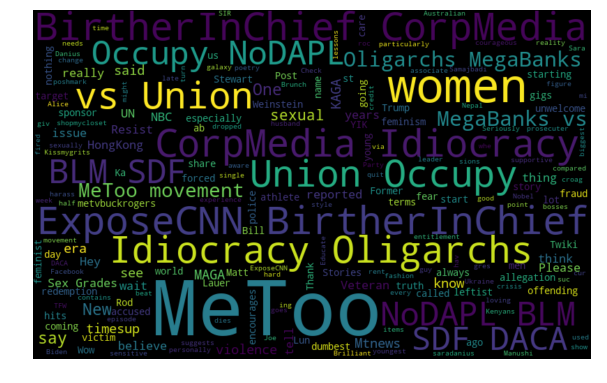

In [15]:
#Common words used in tweets, using WordCloud
all_words = ' '.join([text for text in list_tweets])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()